In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [352]:
titanicDF = pd.read_csv('titanic.csv')
titanicDF.head(3)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [353]:
print(titanicDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [354]:
titanicDF['age'].fillna(titanicDF['age'].mean(), inplace=True)
titanicDF['cabin'].fillna('N', inplace=True)
titanicDF['embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수', titanicDF.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [355]:
titanicDF.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [356]:
titanicDF['embarked'].fillna('N',inplace=True)

In [357]:
print('데이터 세트 Null 값 개수', titanicDF.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [358]:
print('Sex 값 분포 : \n', titanicDF['sex'].value_counts())
print('\n cabin 값 분포 :\n', titanicDF['cabin'].value_counts())
print('\n embarked 값 분포 :\n', titanicDF['embarked'].value_counts())

Sex 값 분포 : 
 sex
male      577
female    314
Name: count, dtype: int64

 cabin 값 분포 :
 cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 embarked 값 분포 :
 embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [359]:
# titanicDF['cabin'].unique()  # 이미 처리되어있는 csv.
"""
원래라면 ?

titanicDF['cabin'] = titanicDF.str[:1] 해야핸ㅆ따 ~
"""
titanicDF['cabin'] = titanicDF['cabin'].str[:1]

In [360]:
# 어린이, 여자, 노인이 구조 1순위였고 2순위는 부자나 유명인이었다는 것은 유명.

titanicDF.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<Axes: xlabel='sex', ylabel='survived'>

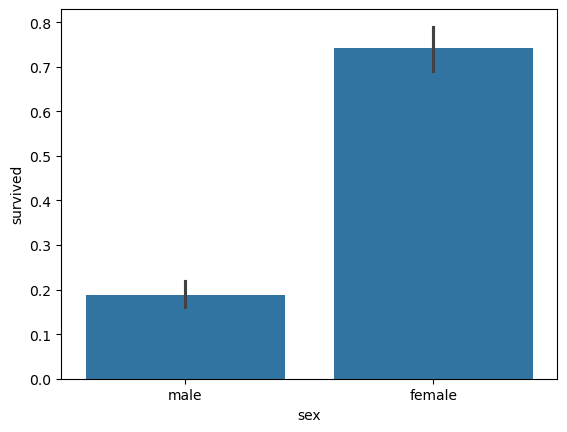

In [361]:
sns.barplot(x='sex', y='survived', data=titanicDF)

<Axes: xlabel='pclass', ylabel='survived'>

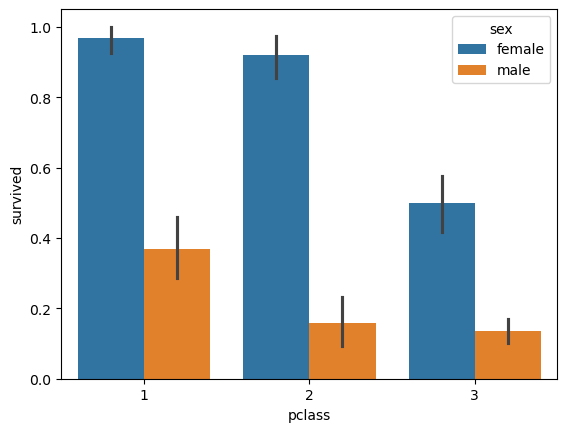

In [362]:
sns.barplot(x='pclass', y='survived', hue='sex', data=titanicDF)

In [363]:
def get_category(age):
    cat = ''
    if age <= -1: cat='Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Kids'
    elif age <= 18: cat = 'Teen'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elder'

    return cat

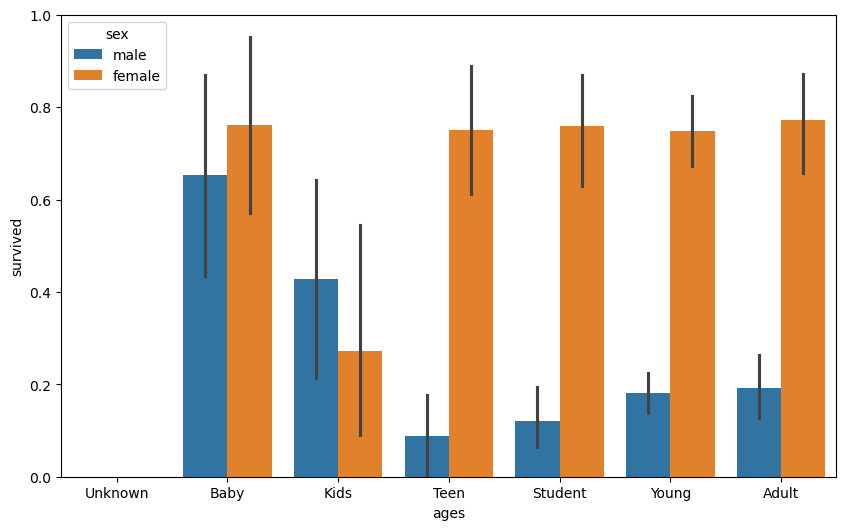

In [364]:
plt.figure(figsize=(10,6))

group_names = ['Unknown','Baby','Kids','Teen','Student','Young','Adult']

titanicDF['ages'] = titanicDF['age'].apply(lambda x: get_category(x))
sns.barplot(x='ages', y='survived', hue='sex', data=titanicDF, order=group_names)
titanicDF.drop('ages', axis=1,inplace=True)

In [365]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])


    return dataDF

titanicDF = encode_features(titanicDF)
titanicDF.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [366]:
def fillna(DF):
    DF['age'].fillna(DF['age'].mean(), inplace=True)
    DF['cabin'].fillna('N', inplace=True)
    DF['embarked'].fillna('N', inplace=True)
    DF['fare'].fillna(DF['fare'].mean(), inplace=True)
    return DF

def drop_features(DF):
    DF.drop(['passengerid', 'name', 'ticket'], axis=1 , inplace=True)
    return DF
    
def format_features(DF):
    DF['cabin'] = DF['cabin'].str[:1]   # 이미 처리되어있는 것
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder(        )
        le = le.fit(DF[feature])
        DF[feature] = le.transform(DF[feature])
    return DF

def transform_features(DF):
    DF = fillna(DF)
    DF = drop_features(DF)    # 보유 csv에는 없는 것들 삭제 목적.
    DF = format_features(DF)
    return DF

In [367]:
retitanicDF = pd.read_csv('titanic.csv')
# retitanicDF.drop(['class','who','embark_town','alive'], axis=1, inplace=True)   # object 제거

In [368]:
# retitanicDF['age'].fillna(retitanicDF['age'].mean(), inplace=True)
# retitanicDF['deck'].fillna('N', inplace=True)
# retitanicDF['embarked'].fillna('N',inplace=True)

In [369]:
# retitanicDF.isnull().sum()

In [370]:
y_titanicDF = retitanicDF['survived']
X_titanicDF = retitanicDF.drop('survived', axis=1)

X_titanicDF = transform_features(X_titanicDF)
X_titanicDF

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [371]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanicDF, y_titanicDF, test_size=0.2, random_state=11)

In [372]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [373]:
# 아래코드 오류 발생. object 사항 제거 후 책 예제처럼 하자.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 333 to 703
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    int32  
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   cabin     712 non-null    int32  
 7   embarked  712 non-null    int32  
dtypes: float64(2), int32(3), int64(3)
memory usage: 41.7 KB


In [374]:
DT_clf = DecisionTreeClassifier(random_state=11)
RF_clf = RandomForestClassifier(random_state=11)
LR_clf = LogisticRegression(solver = 'liblinear')

DT_clf.fit(X_train, y_train)
DT_pred = DT_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, DT_pred)))

RF_clf.fit(X_train, y_train)
RF_pred = RF_clf.predict(X_test)
print('RandomTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, RF_pred)))


LR_clf.fit(X_train, y_train)
LR_pred = LR_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, LR_pred)))


DecisionTreeClassifier 정확도 : 0.7877
RandomTreeClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659


In [377]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanicDF)):
        X_train, X_test = X_titanicDF.values[train_index], X_titanicDF.values[test_index]
        y_train, y_test = y_titanicDF.values[train_index], y_titanicDF.values[test_index]
        
        clf.fit(X_train, y_train)

        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))


    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

exec_kfold(DT_clf, folds=5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [378]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DT_clf, X_titanicDF, y_titanicDF, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 0.7430
교차 검증 1 정확도 0.7753
교차 검증 2 정확도 0.7921
교차 검증 3 정확도 0.7865
교차 검증 4 정확도 0.8427
평균 정확도 : 0.7879


In [380]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(DT_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)

accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
